# DA3 Challenges
## Assignment 1

In [1]:
import pandas as pd

In [2]:
page_network=pd.read_table('page_124025261904_2018_02_18_21_27_56.gdf')

In [89]:
page_stats=pd.read_table('page_124025261904_2018_02_18_21_27_56_statsperday.tab')

In [130]:
x=page_stats.loc[page_stats['likes'].idxmax(),['day']]
print ('The day with the most likes is',x)

The day with the most likes is day    2018-02-11
Name: 3, dtype: object


In [3]:
page_post=pd.read_table('page_124025261904_2018_02_18_21_27_56_fullstats.tab')

In [139]:
page_post.columns

Index(['type', 'by', 'post_id', 'post_link', 'post_message', 'picture',
       'full_picture', 'link', 'link_domain', 'post_published',
       'post_published_unix', 'post_published_sql', 'likes_count_fb',
       'comments_count_fb', 'reactions_count_fb', 'shares_count_fb',
       'engagement_fb', 'comments_retrieved', 'comments_base',
       'comments_replies', 'comment_likes_count', 'rea_NONE', 'rea_LIKE',
       'rea_LOVE', 'rea_WOW', 'rea_HAHA', 'rea_SAD', 'rea_ANGRY',
       'rea_THANKFUL', 'gender', 'equality'],
      dtype='object')

In [5]:
page_post.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
post_published_unix,50.0,1.518519e+09,266878.468934,1.518073e+09,1.518307e+09,1.518535e+09,1.518724e+09,1.518980e+09
likes_count_fb,50.0,2.199600e+02,195.294332,4.000000e+01,7.375000e+01,1.425000e+02,2.862500e+02,8.280000e+02
comments_count_fb,50.0,7.440000e+00,10.698388,0.000000e+00,2.000000e+00,4.500000e+00,8.000000e+00,5.900000e+01
reactions_count_fb,50.0,2.511000e+02,223.021940,4.400000e+01,7.875000e+01,1.550000e+02,3.722500e+02,9.610000e+02
shares_count_fb,50.0,8.986000e+01,141.807287,1.000000e+00,1.200000e+01,2.800000e+01,1.187500e+02,8.920000e+02
engagement_fb,50.0,3.484000e+02,354.739801,5.900000e+01,9.700000e+01,1.890000e+02,5.217500e+02,1.880000e+03
comments_retrieved,50.0,6.960000e+00,10.421642,0.000000e+00,2.000000e+00,3.500000e+00,7.000000e+00,5.700000e+01
comments_base,50.0,6.100000e+00,8.981273,0.000000e+00,2.000000e+00,3.500000e+00,6.750000e+00,5.600000e+01
comments_replies,50.0,8.600000e-01,2.618693,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01
comment_likes_count,50.0,4.300000e+00,10.347532,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,5.700000e+01


In [6]:
page_comment=pd.read_table('page_124025261904_2018_02_18_21_27_56_comments.tab')

In [7]:
page_comment.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_reply,348.0,0.123563,0.329556,0.0,0.0,0.0,0.0,1.0
comment_like_count,348.0,0.617816,1.293042,0.0,0.0,0.0,1.0,14.0


In [44]:
def word_present(text, query):
    import re
    text = str(text).lower()
    query = str(query).lower()
    
    tokens = re.findall(r"[\w']+|[.,!?;$@#]", text)
    if query in tokens:
        return 1
    return 0

In [45]:
page_post['gender']=page_post['post_message'].apply(word_present, args=('gender',))
page_post['equality']=page_post['post_message'].apply(word_present, args=('equality',))

In [46]:
page_comment['gender']=page_comment['comment_message'].apply(word_present, args=('gender',))
page_comment['equality']=page_comment['comment_message'].apply(word_present, args=('equality',))

In [47]:
page_post[['gender']].describe()

,gender
count,50.000000
mean,0.240000
std,0.431419
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [48]:
page_post[['equality']].describe()

,equality
count,50.000000
mean,0.100000
std,0.303046
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [49]:
page_comment[['gender']].describe()

,gender
count,348.000000
mean,0.043103
std,0.203382
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Visualization

In [14]:
import matplotlib.pyplot as plt

In [50]:
plt.hist(page_post[['gender']],bins=5)

(array([ 38.,   0.,   0.,   0.,  12.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 5 Patch objects>)

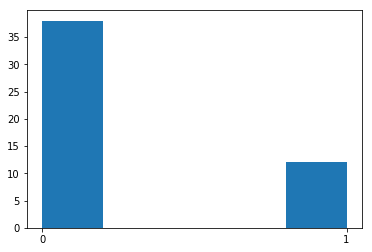

In [51]:
plt.show()

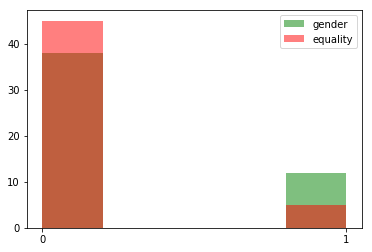

In [52]:
plt.hist(page_post[['gender']],color='g',bins=5,alpha=0.5,label='gender')
plt.hist(page_post[['equality']],color='r',bins=5,alpha=0.5,label='equality')
plt.legend(loc='upper right')
plt.show()

In [53]:
plt.hist(page_comment[['gender']],bins=5)

(array([ 333.,    0.,    0.,    0.,   15.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 5 Patch objects>)

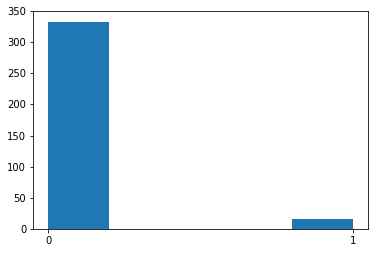

In [54]:
plt.show()

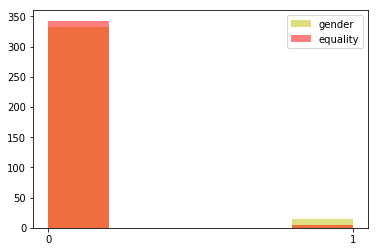

In [55]:
plt.hist(page_comment[['gender']],color='y',bins=5,alpha=0.5,label='gender')
plt.hist(page_comment[['equality']],color='r',bins=5,alpha=0.5,label='equality')
plt.legend(loc='upper right')
plt.show()

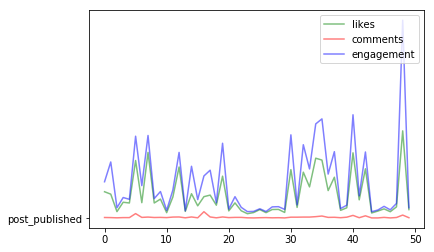

In [88]:
plt.plot(page_post['likes_count_fb'],color='g',alpha=0.5,label='likes')
plt.plot(page_post['comments_count_fb'],color='r',alpha=0.5,label='comments')
plt.plot(page_post['engagement_fb'],color='b',alpha=0.5,label='engagement')
plt.legend(loc='upper right')
plt.show()

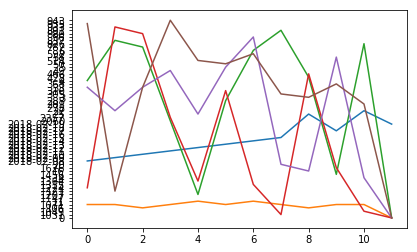

In [116]:
plt.plot(page_stats)
plt.show()

I havent found a way to put the day on horizontal axis

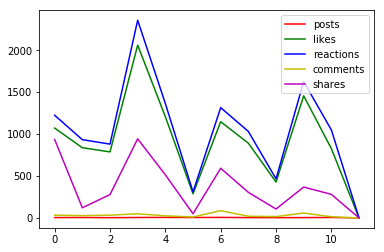

In [114]:
plt.plot(page_stats['posts'], color='r',label='posts')
plt.plot(page_stats['likes'], color='g',label='likes')
plt.plot(page_stats['reactions'], color='b',label='reactions')
plt.plot(page_stats['comments'], color='y',label='comments')
plt.plot(page_stats['shares'], color='m',label='shares')
plt.legend(loc='upper right')
plt.show()

**Optional assignment**
consolidate the total number of comments that mention a word, and bring that information at post level
I tried to calculate the percent of comments having specific keywords in one post. However I am not sure if the result is right.

In [158]:
page_comment.columns

Index(['position', 'post_id', 'post_by', 'post_text', 'post_published',
       'comment_id', 'comment_by', 'is_reply', 'comment_message',
       'comment_published', 'comment_like_count', 'attachment_type',
       'attachment_url', 'gender', 'equality'],
      dtype='object')

In [146]:
new_post=page_comment[['post_id','gender','equality']]

In [148]:
new_post.columns

Index(['post_id', 'gender', 'equality'], dtype='object')

In [155]:
aggregations = {
    'gender':'sum',
    'equality':'sum'
    
}
new_post.groupby('post_id').agg(aggregations)

,gender,equality
post_id,,
124025261904_10155181124296905,0,0
124025261904_10155185785546905,0,0
124025261904_10155186129386905,0,0
124025261904_10155188852361905,0,0
124025261904_10155188859421905,1,0
124025261904_10155188866631905,0,0
124025261904_10155189260216905,0,0
124025261904_10155189428526905,0,0
124025261904_10155191266136905,0,0


In [156]:
post_count=pd.merge(page_post, new_post, on=['post_id'])

In [157]:
post_count.columns

Index(['type', 'by', 'post_id', 'post_link', 'post_message', 'picture',
       'full_picture', 'link', 'link_domain', 'post_published',
       'post_published_unix', 'post_published_sql', 'likes_count_fb',
       'comments_count_fb', 'reactions_count_fb', 'shares_count_fb',
       'engagement_fb', 'comments_retrieved', 'comments_base',
       'comments_replies', 'comment_likes_count', 'rea_NONE', 'rea_LIKE',
       'rea_LOVE', 'rea_WOW', 'rea_HAHA', 'rea_SAD', 'rea_ANGRY',
       'rea_THANKFUL', 'gender_x', 'equality_x', 'gender_y', 'equality_y'],
      dtype='object')

In [161]:
post_count['percentage_gender']=100*post_count['gender_y']/post_count['comments_count_fb']
post_count['percentage_equality']=100*post_count['equality_y']/post_count['comments_count_fb']

In [164]:
post_count[['post_id','percentage_gender','percentage_equality']]

,post_id,percentage_gender,percentage_equality
0,124025261904_10155209250991905,0.000000,0.0
1,124025261904_10155209250991905,0.000000,0.0
2,124025261904_10155209250991905,0.000000,0.0
3,124025261904_10155209250991905,0.000000,0.0
4,124025261904_10155208588076905,0.000000,0.0
5,124025261904_10155208588076905,0.000000,0.0
6,124025261904_10155208588076905,0.000000,0.0
7,124025261904_10155208585781905,0.000000,0.0
8,124025261904_10155208711676905,0.000000,0.0
9,124025261904_10155208711676905,0.000000,0.0


## Assignment 2

In [56]:
import pickle

In [57]:
tweet_data=pickle.load(open("NhungPham_EN.pkl","rb"))

In [58]:
tweet_sentiment=pickle.load(open("Trang-Nhung Pham - NhungPham_EN_completed.pkl","rb"))

In [59]:
tweet_data.columns

Index(['id', 'text'], dtype='object')

In [60]:
tweet_sentiment.columns

Index(['id', 'text', 'negative', 'positive', 'neutral'], dtype='object')

Merging tables and basic description

In [61]:
pd.merge(tweet_data, tweet_sentiment, on=['id','text'])

,id,text,negative,positive,neutral
0,828540415360004096,RT @Loui_Picard: Manage up with Digital Analyt...,-1,1,0
1,828540731975401473,RT @jose_garde: Manage up with Digital Analyti...,-1,1,0
2,828540960443351041,RT @JoanIratxeta: Manage up with Digital Analy...,-1,1,0
3,828544758989602816,"Senior Digital Analytics Manager - £70,000 (+1...",-1,1,0
4,828553689140981760,"Senior Digital Analytics Manager - £70,000 (+1...",-1,1,0
5,828556421822312449,Fractal Analytics is hiring a Principal Consul...,-1,1,0
6,828559249773060096,Test Your Mettle: Adobe Digital Analytics Comp...,-1,1,0
7,828565053674749952,RT @Loui_Picard: Manage up with Digital Analyt...,-1,1,0
8,828565322907131904,RT @jose_garde: Manage up with Digital Analyti...,-1,1,0
9,828565538926362624,RT @JoanIratxeta: Manage up with Digital Analy...,-1,1,0


In [62]:
sentiment_data=pd.merge(tweet_data, tweet_sentiment, on=['id','text'])

In [63]:
sentiment_data['positive'].value_counts()

1    299
2     62
3     12
4      1
Name: positive, dtype: int64

In [64]:
sentiment_data['negative'].value_counts()

-1    342
-2     26
-3      5
-4      1
Name: negative, dtype: int64

In [65]:
sentiment_data.dtypes

id           int64
text        object
negative    object
positive    object
neutral     object
dtype: object

Categorizing tweets based on sentiment index

In [66]:
sentiment_data['negative']=sentiment_data['negative'].apply(pd.to_numeric)
sentiment_data['positive']=sentiment_data['positive'].apply(pd.to_numeric)
sentiment_data['neutral']=sentiment_data['neutral'].apply(pd.to_numeric)

In [67]:
sentiment_data[(sentiment_data['negative']<-2) & (sentiment_data['positive']<2)]

,id,text,negative,positive,neutral
73,829050912425521156,"Find out why Rob McLaughlin, Head of Digital A...",-3,1,-1
75,829052916002590721,RT @cranberrypanda: Find out why Rob McLaughli...,-3,1,-1
83,829096327799767041,RT @cranberrypanda: Find out why Rob McLaughli...,-3,1,-1
164,829649750249046016,"Find out why Rob McLaughlin, Head of Digital A...",-3,1,-1
360,831956876845842434,Here for today's #prprofs chat on #fakenews. P...,-3,1,-1


In [68]:
sentiment_data[(sentiment_data['neutral']==0) & (sentiment_data['positive']<1)]

,id,text,negative,positive,neutral


In [69]:
sentiment_data['sentiment']=sentiment_data['negative']+sentiment_data['positive']+sentiment_data['neutral']

In [70]:
sentiment_data['sentiment'].value_counts()

 0    272
 2     61
-2     22
 3     10
-3      6
-1      2
 4      1
Name: sentiment, dtype: int64

Select specific tweets based on sentiment index

In [71]:
sentiment_data.loc[sentiment_data['sentiment'].idxmax()]

id                                          828982953749409792
text         Online activity used for digital analytics is ...
negative                                                    -1
positive                                                     4
neutral                                                      1
sentiment                                                    4
Name: 53, dtype: object

In [72]:
sentiment_data[sentiment_data['sentiment'] >2]

,id,text,negative,positive,neutral,sentiment
17,828671243708665857,RT @DeVryCareers: Do you love data and digital...,-1,3,1,3
53,828982953749409792,Online activity used for digital analytics is ...,-1,4,1,4
65,829022604543537153,RT @CoworkingJhb: Online activity used for dig...,-1,3,1,3
72,829050008058081280,Digital Analytics Postdegree (starting on Apri...,-1,3,1,3
74,829051251988000768,Digital Analytics Postdegree (starting on Apri...,-1,3,1,3
87,829159388560584708,This #job might be a great fit for you: Digita...,-1,3,1,3
145,829533236355215362,This #job might be a great fit for you: Digita...,-1,3,1,3
146,829537985662160896,RT @LEGO_Careers: This #job might be a great f...,-1,3,1,3
214,830037356879212544,3 analytics questions to great #highered pros ...,-1,3,1,3
316,831206651843723264,Every nonprofit should check this out. Great ...,-1,3,1,3


## Assignment 3

In [73]:
data=pd.read_excel('Analytics All Web Site Data Pages 20170217-20180217.xlsx', sheetname='Dataset1')

In [74]:
data

,Page,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value
0,/,539,350,158.044379,261,0.398467,0.372913,0
1,/key-concepts/,417,225,28.770833,99,0.060606,0.079137,0
2,/key-concepts/chatbots-in-customer-service-2/,111,64,85.630769,9,0.444444,0.414414,0
3,/2017/09/13/big-brother-is-tracking-you-how-te...,107,92,173.720930,70,0.742857,0.598131,0
4,/social-media/,85,58,162.969697,30,0.233333,0.223529,0
5,/2017/09/19/transforming-digital-traces-did-ca...,82,67,275.896552,52,0.865385,0.646341,0
6,/2017/09/12/the-grass-is-always-greener-on-the...,53,42,32.962963,19,0.684211,0.490566,0
7,/key-concepts/data-journalism-2/,53,33,80.567568,1,0.000000,0.301887,0
8,/our-social-media-presence/,45,23,42.703704,15,0.533333,0.400000,0
9,/2017/09/26/customer-criticisms-how-dominos-tu...,43,30,254.454545,16,0.250000,0.232558,0


In [75]:
data.describe()

,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
mean,388.363636,258.909091,127.590326,132.818182,0.426427,0.371299,0.0
std,796.473512,541.751134,85.256285,261.461974,0.275417,0.166564,0.0
min,43.000000,23.000000,28.770833,1.000000,0.000000,0.079137,0.0
25%,53.000000,37.500000,61.635636,15.500000,0.241667,0.267222,0.0
50%,85.000000,64.000000,107.771645,30.000000,0.444444,0.372913,0.0
75%,264.000000,158.500000,168.345314,84.500000,0.608772,0.452490,0.0
max,2737.000000,1864.000000,275.896552,889.000000,0.865385,0.646341,0.0


In [76]:
data[(data['Pageviews'] > 100) & (data['Unique Pageviews'] >100)]

,Page,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value
0,/,539,350,158.044379,261,0.398467,0.372913,0
1,/key-concepts/,417,225,28.770833,99,0.060606,0.079137,0
10,NaN,2737,1864,107.771645,889,0.478065,0.324808,0


Find the page with highest Page views (similar commands can be done to find page with highest/lowest other values)

In [77]:
data.loc[data['Pageviews'].idxmax(),['Page']]

Page    NaN
Name: 10, dtype: object

Select sites with keywords in URL and description of these sites

In [78]:
data['social']=data['Page'].apply(word_present,args=('social',))
data['media']=data['Page'].apply(word_present,args=('media',))

In [79]:
data[(data['social']==1)&(data['media']==1)]

,Page,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value,social,media
4,/social-media/,85,58,162.969697,30,0.233333,0.223529,0,1,1
8,/our-social-media-presence/,45,23,42.703704,15,0.533333,0.400000,0,1,1


In [80]:
social_media=data[(data['social']==1)&(data['media']==1)]

In [81]:
social_media.describe()

,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value,social,media
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.0,2.0
mean,65.000000,40.500000,102.836700,22.500000,0.383333,0.311765,0.0,1.0,1.0
std,28.284271,24.748737,85.040899,10.606602,0.212132,0.124784,0.0,0.0,0.0
min,45.000000,23.000000,42.703704,15.000000,0.233333,0.223529,0.0,1.0,1.0
25%,55.000000,31.750000,72.770202,18.750000,0.308333,0.267647,0.0,1.0,1.0
50%,65.000000,40.500000,102.836700,22.500000,0.383333,0.311765,0.0,1.0,1.0
75%,75.000000,49.250000,132.903199,26.250000,0.458333,0.355882,0.0,1.0,1.0
max,85.000000,58.000000,162.969697,30.000000,0.533333,0.400000,0.0,1.0,1.0
